In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# Download the datase from openml
dataset = fetch_openml(data_id=42803, as_frame=True)

In [3]:
# Extract
df_X = dataset["frame"]
df_X.shape

(363243, 67)

In [4]:
df_X.dtypes

Accident_Index                         object
Vehicle_Reference_df_res              float64
Vehicle_Type                          float64
Towing_and_Articulation               float64
Vehicle_Manoeuvre                     float64
                                       ...   
Bus_or_Coach_Passenger                float64
Pedestrian_Road_Maintenance_Worker    float64
Casualty_Type                         float64
Casualty_Home_Area_Type               float64
Casualty_IMD_Decile                   float64
Length: 67, dtype: object

In [5]:
import pandas as pd
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

In [6]:
df_X.describe(exclude="number")

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,363243,319866,319822,319866,298758
unique,140056,3,365,1439,204,25979
top,201543P296025,1.0,14/02/2015,17:30,E10000017,E01028497
freq,1332,238639,2144,2972,8457,1456


In [7]:
# For each numerical feature, count number of unique entries
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()

# plot
#%matplotlib inline - not reqd just add ; to end of plot statement
unique_values.plot.bar(logy=True, figsize=(15,4), title="Unique values per feature");

In [8]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 22 duplicates in your database.


In [9]:
# Extract column names of allfeatures,except index
columns_to_consider = df_X.drop(labels=["Accident_Index"],axis=1).columns
print(columns_to_consider.shape)

# drop duplicates
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape

(66,)


(363221, 67)

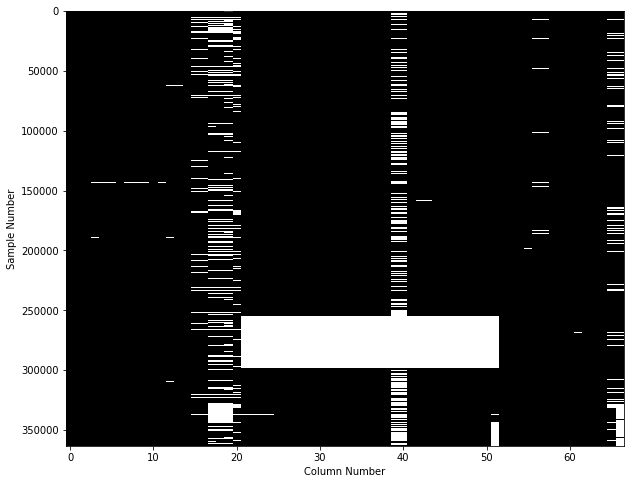

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

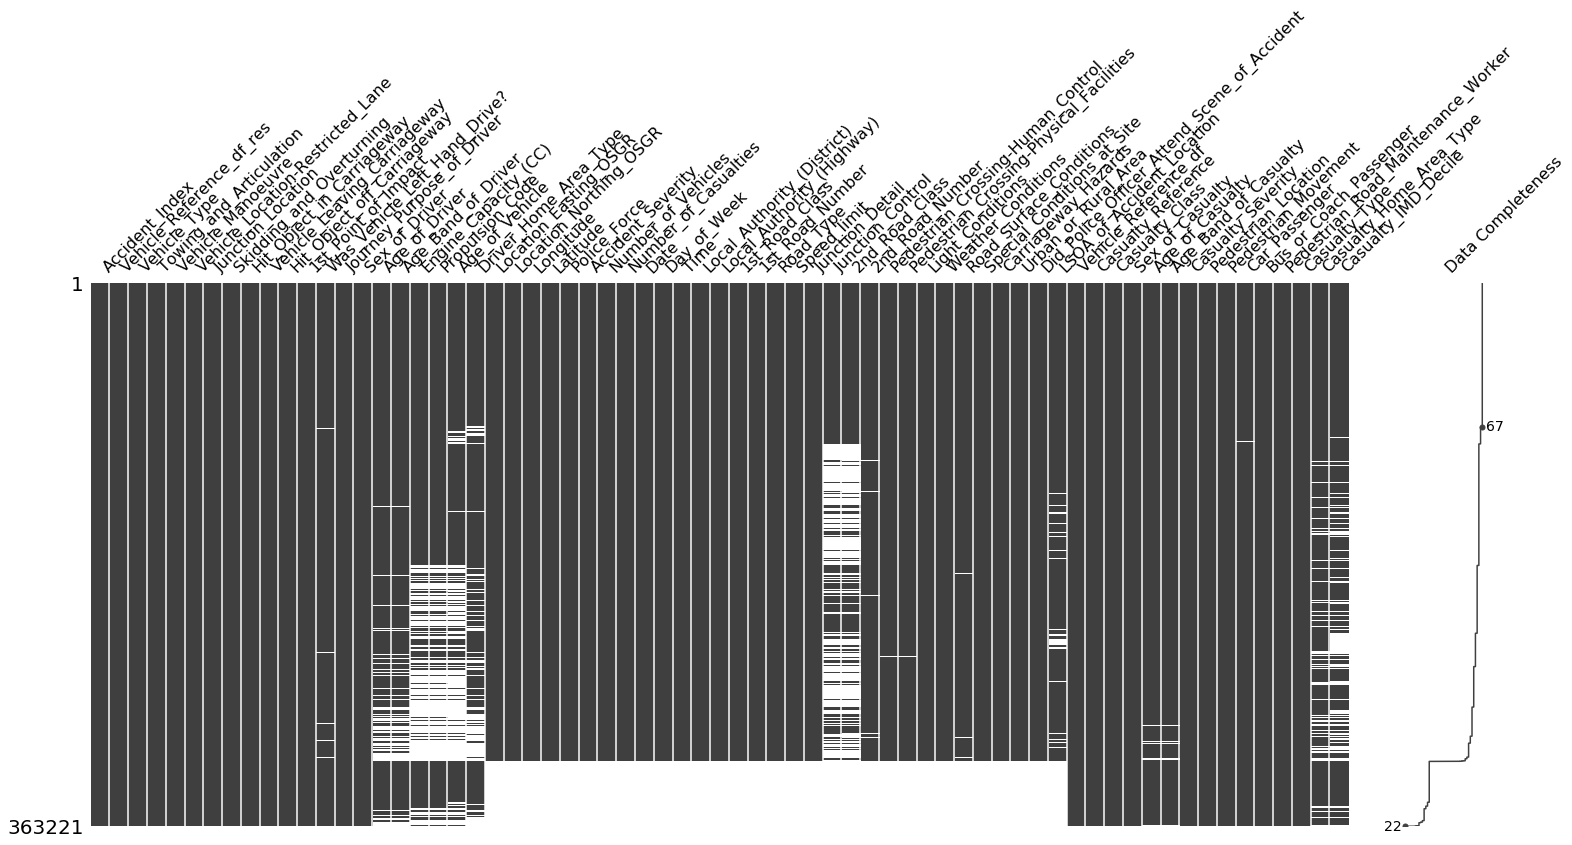

In [11]:
import missingno as msno

msno.matrix(df_X, labels=True, sort="descending");

In [12]:
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

(319790, 67)

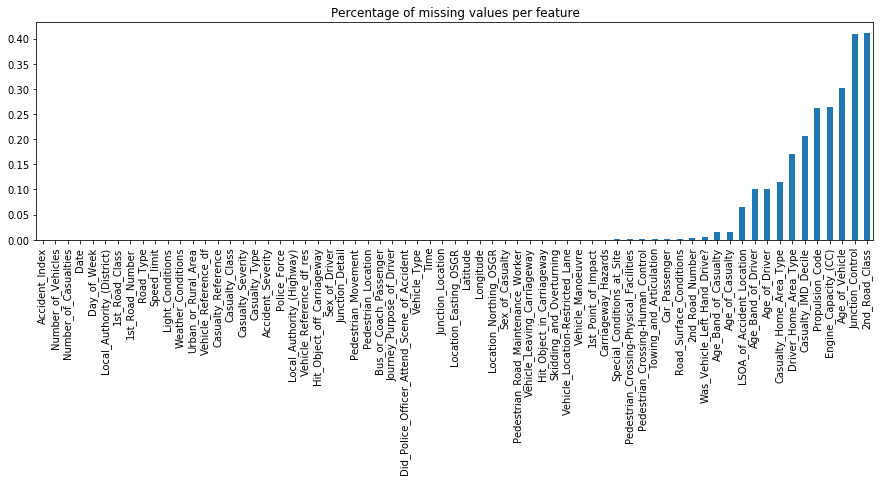

In [13]:
df_X.isna().mean().sort_values().plot(kind="bar", figsize=(15, 4), title="Percentage of missing values per feature");
# y axis represents ratio of missing values per feature

In [14]:
# remove any feature with more than 15% of missing values.
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(319790, 60)

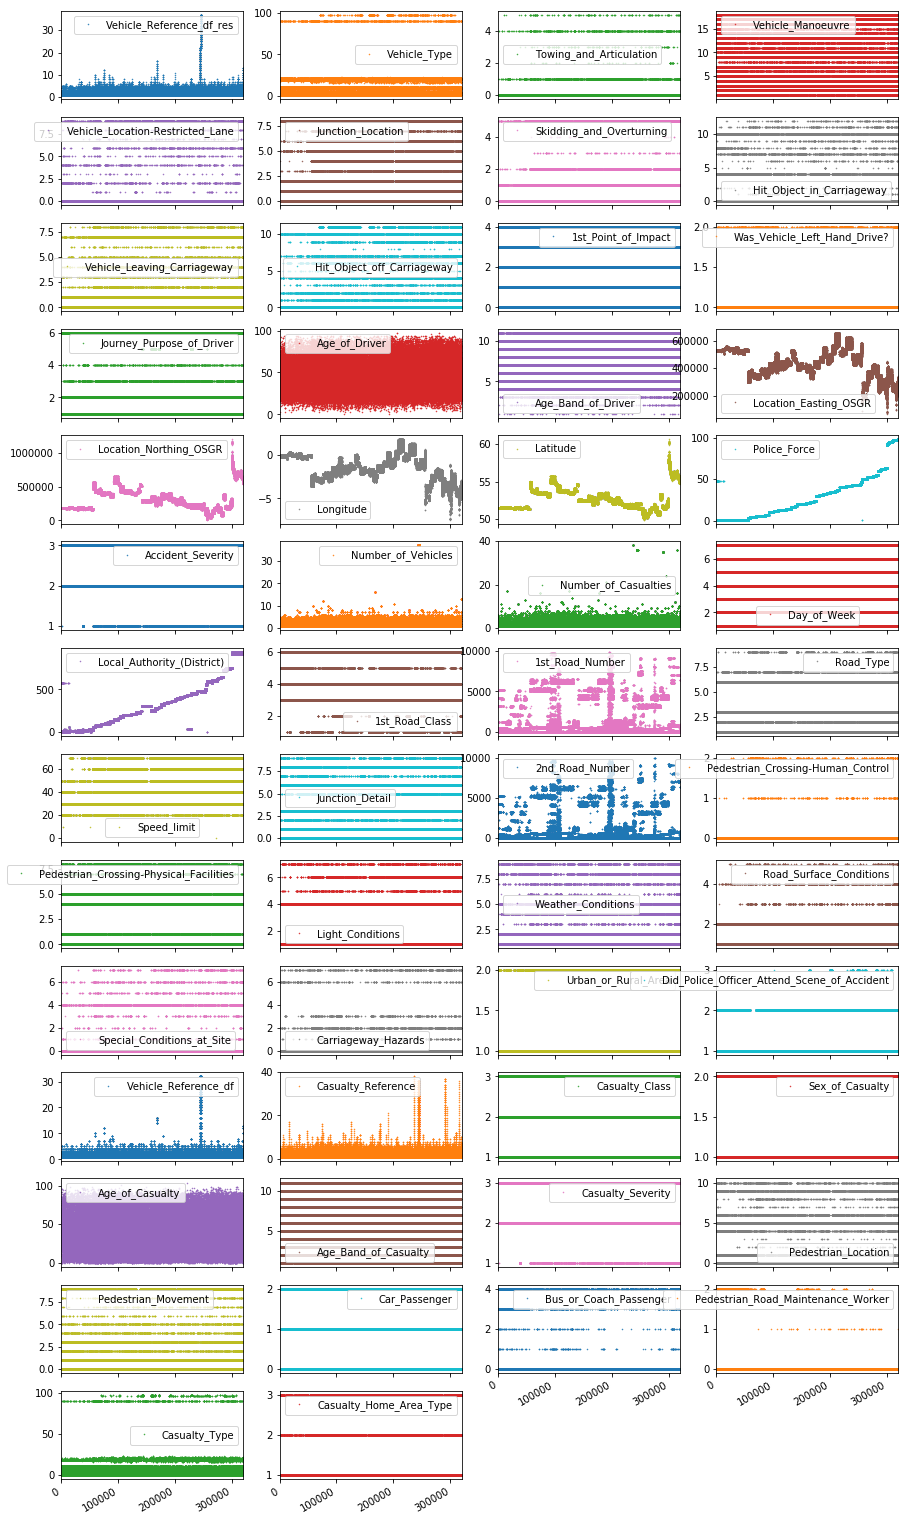

In [15]:
df_X.plot(lw=0,
          marker=".",
          subplots=True,
          layout=(-1, 4),
          figsize=(15, 30),
          markersize=1);

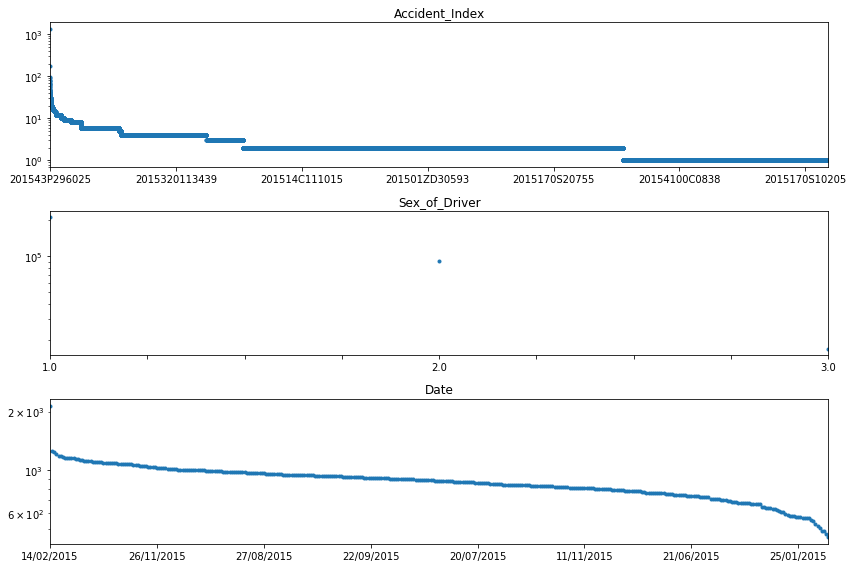

In [16]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

In [17]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

# Removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317665, 60)

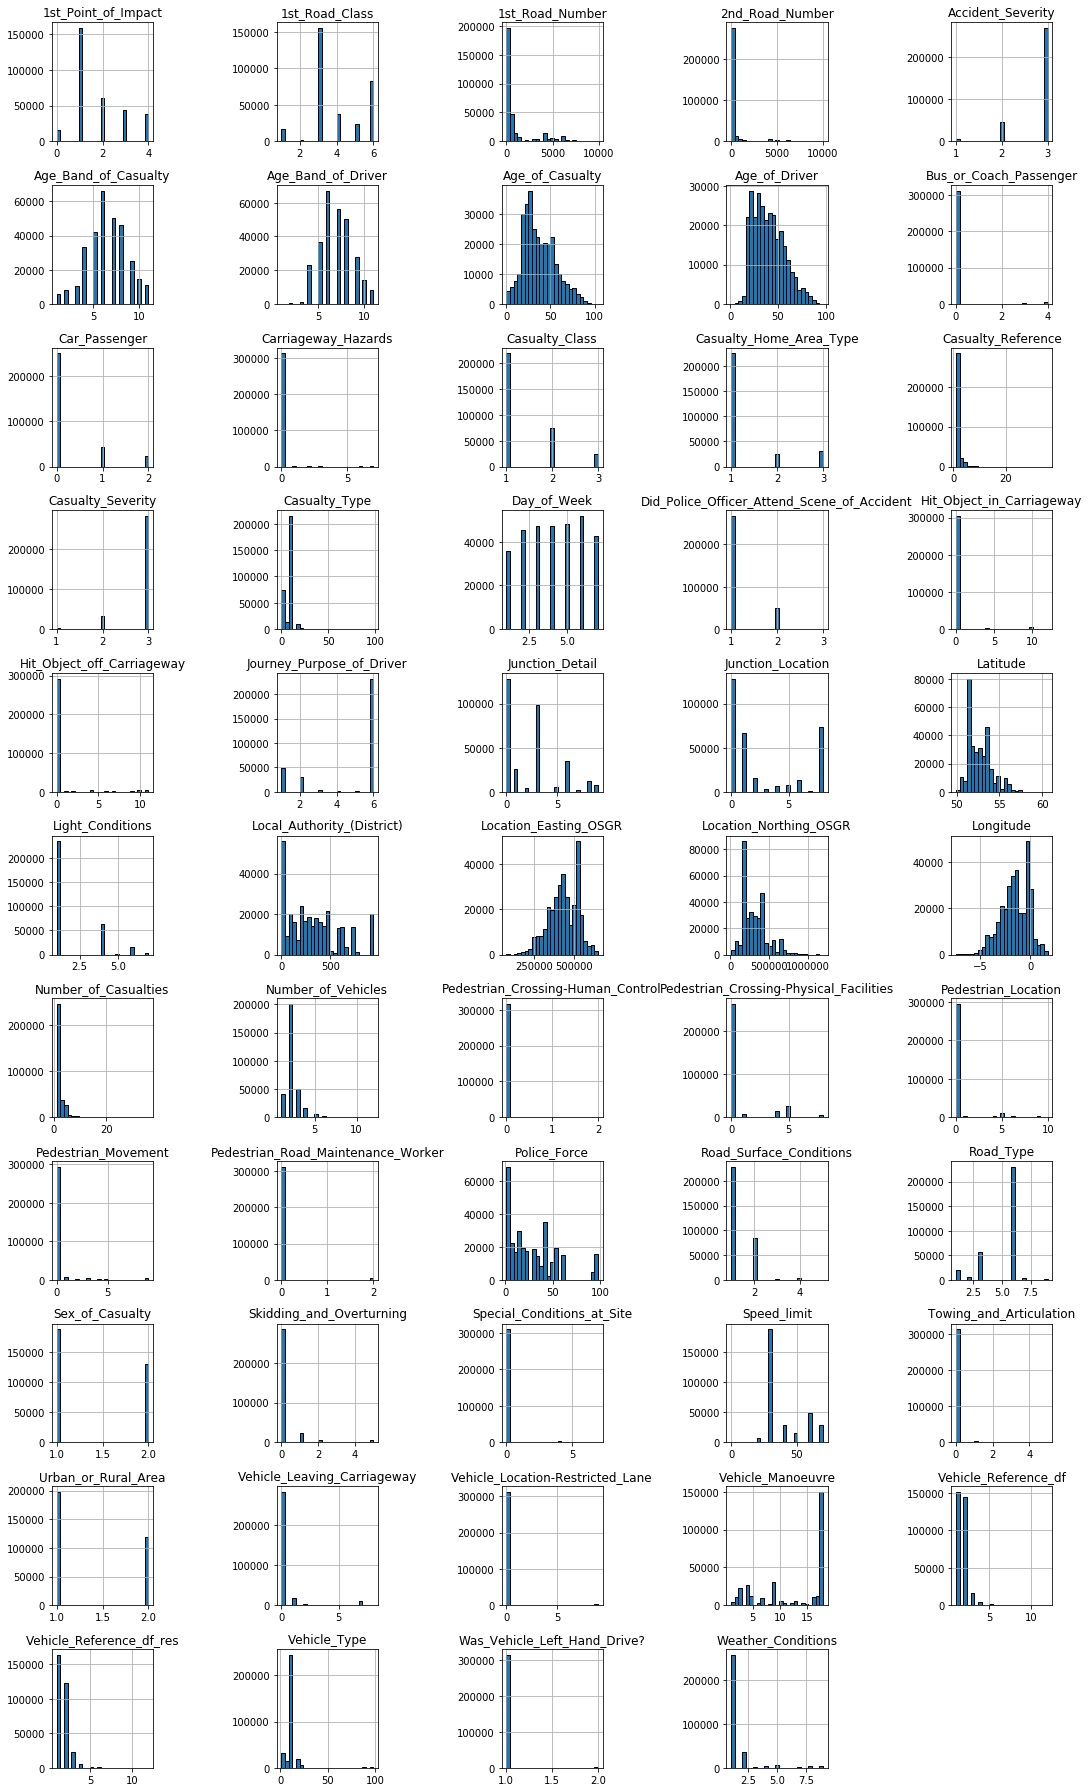

In [18]:
#  Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

Pedestrian_Crossing-Human_Control    0.995259
Was_Vehicle_Left_Hand_Drive?         0.990137
Carriageway_Hazards                  0.983646
Towing_and_Articulation              0.983221
Vehicle_Location-Restricted_Lane     0.982088
dtype: float64

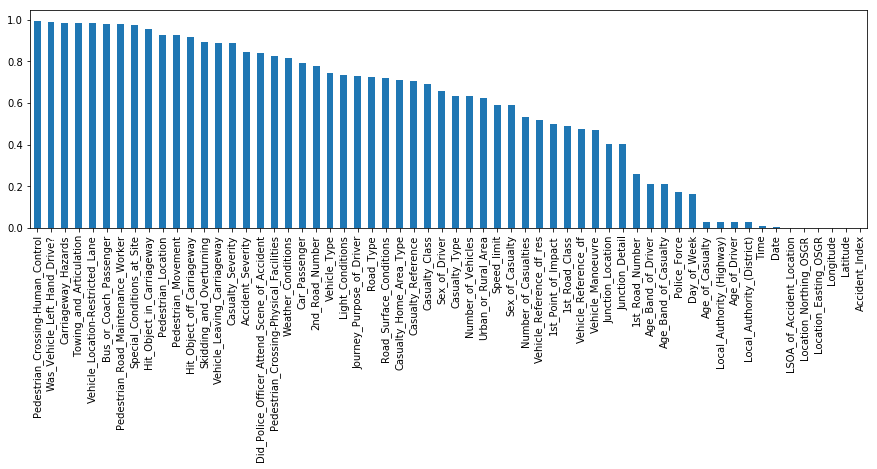

In [19]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

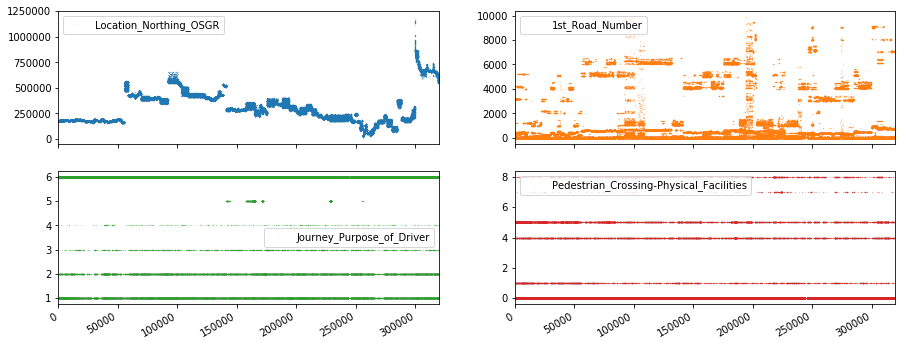

In [20]:
df_X[["Location_Northing_OSGR",
      "1st_Road_Number",
      "Journey_Purpose_of_Driver",
      "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2),
  markersize=0.1, figsize=(15, 6));

In [21]:
# Creates mask to identify numerical features with at least 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25

In [22]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape

(317665, 11)

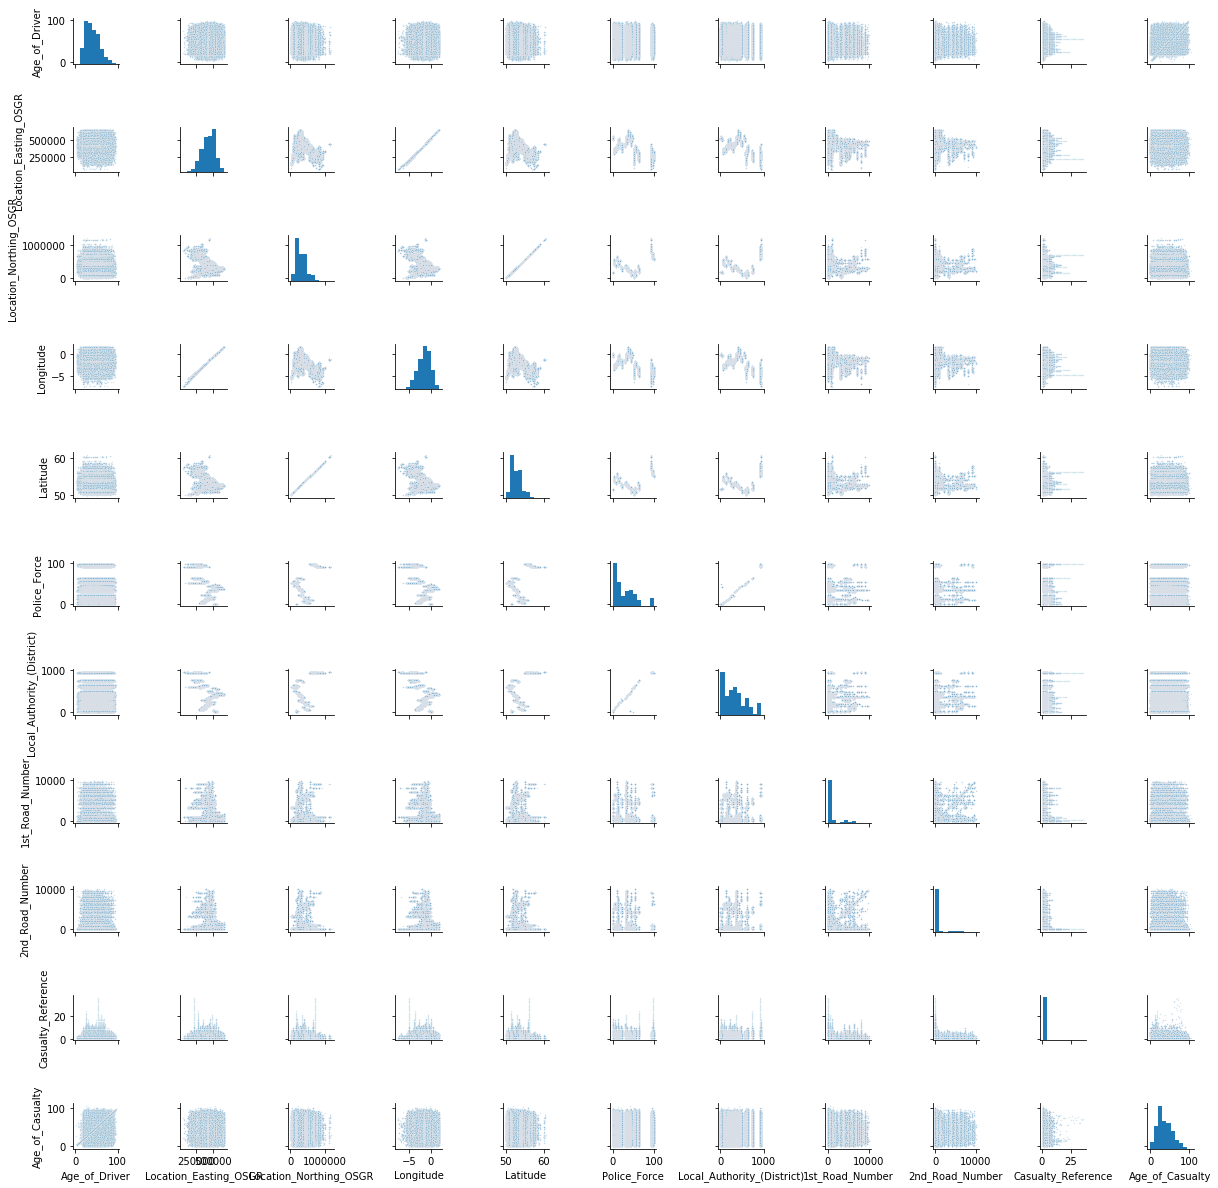

In [23]:
import seaborn as sns

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

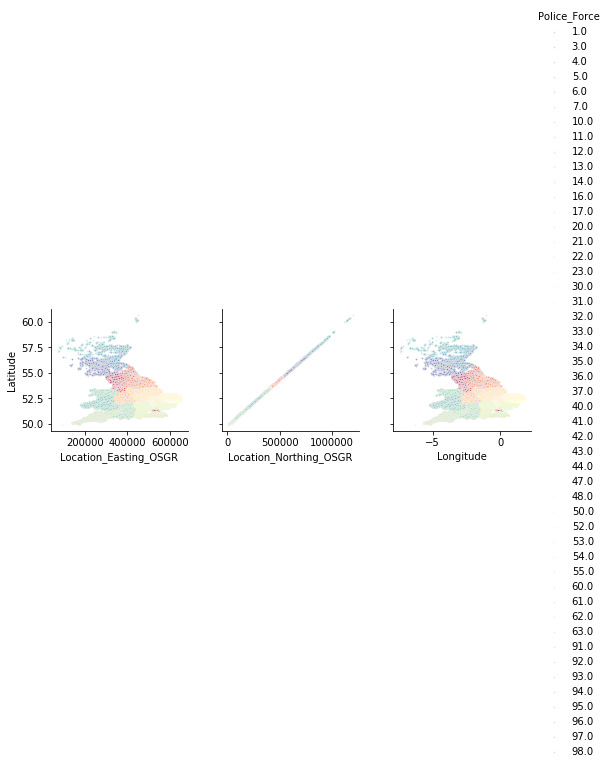

In [24]:
sns.pairplot(
    df_X, plot_kws={"s": 3, "alpha": 0.2}, hue="Police_Force", palette="Spectral",
    x_vars=["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude"],
    y_vars="Latitude");

In [25]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df_X[cols_continuous[~cols_continuous].index]
df_discrete.shape

(317665, 43)

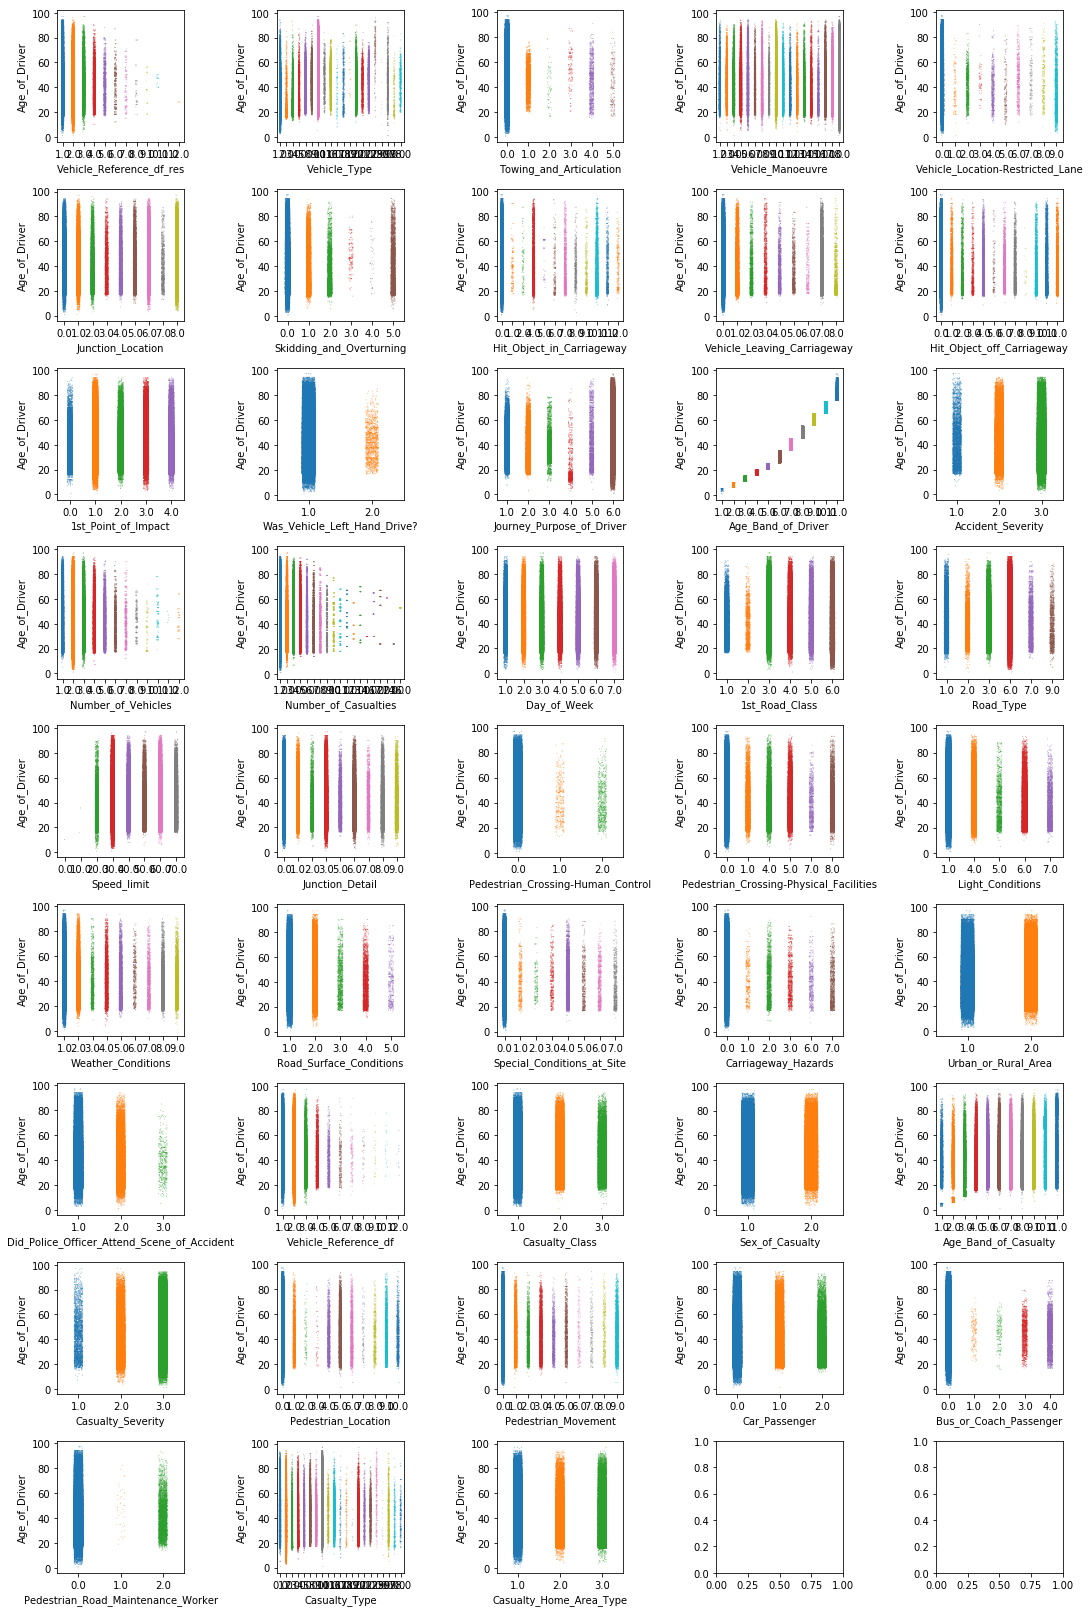

In [26]:
import numpy as np

# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df_X["Age_of_Driver"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout();

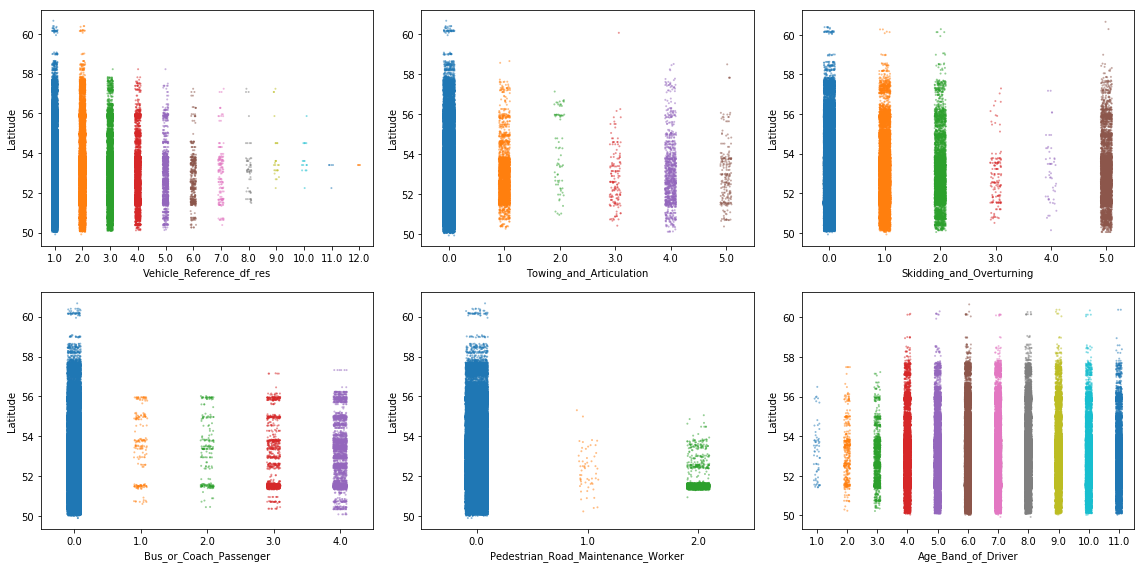

In [27]:
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout();

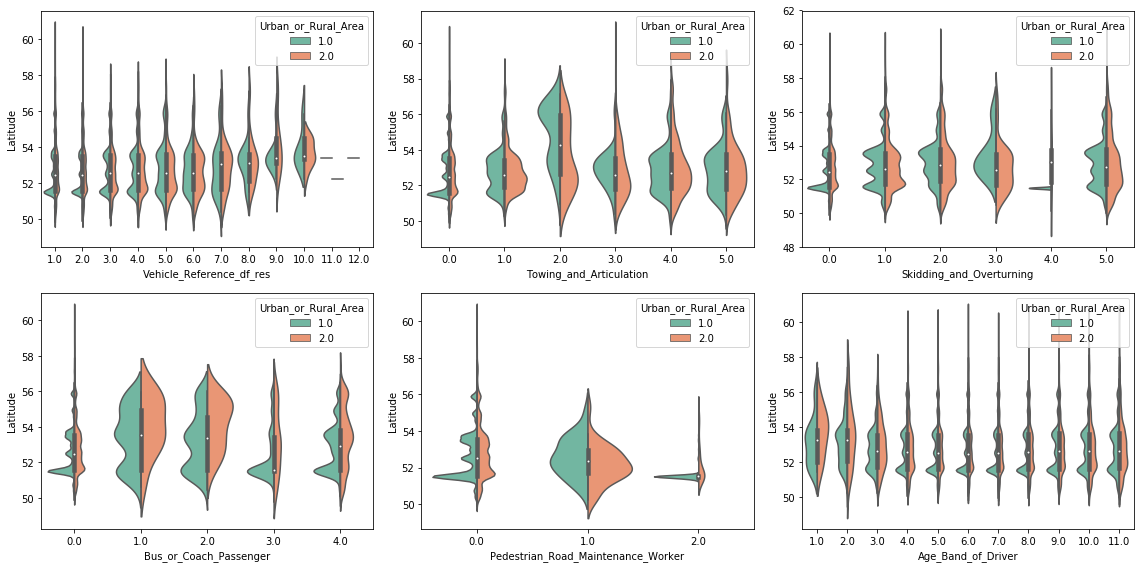

In [28]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_X, x=col, y=df_X["Latitude"], palette="Set2",
                   split=True, hue="Urban_or_Rural_Area", ax=ax)
plt.tight_layout();

In [29]:
# Computes feature correlation
df_corr = df_X.corr(method="pearson")

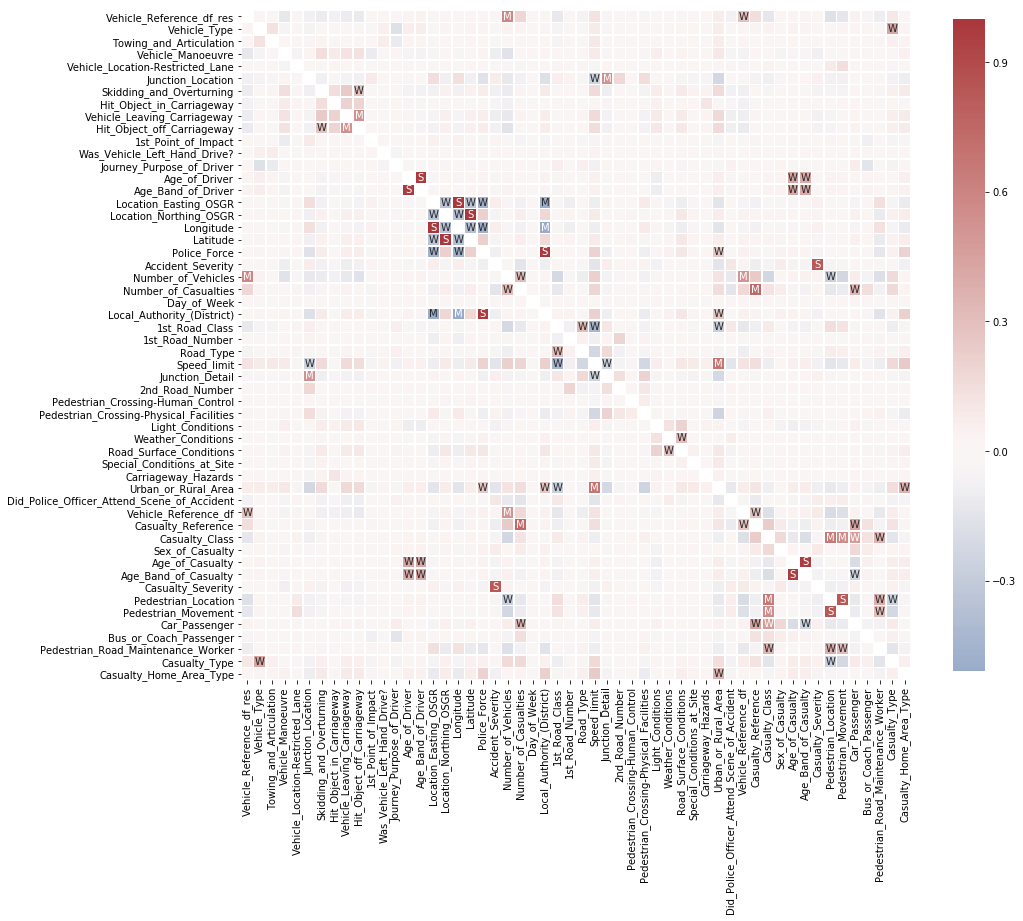

In [30]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [31]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

Local_Authority_(District)  Longitude                -0.509343
                            Location_Easting_OSGR    -0.502919
Police_Force                Longitude                -0.471327
                            Location_Easting_OSGR    -0.461112
Speed_limit                 1st_Road_Class           -0.438931
                                                        ...   
Age_Band_of_Casualty        Age_of_Casualty           0.974397
Age_Band_of_Driver          Age_of_Driver             0.979019
Local_Authority_(District)  Police_Force              0.984819
Longitude                   Location_Easting_OSGR     0.999363
Latitude                    Location_Northing_OSGR    0.999974
Length: 1431, dtype: float64